## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import pearsonr

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [5]:
from sklearn.pipeline import Pipeline

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error  as mse
from sklearn.metrics import mean_absolute_error as mae

In [9]:
import pickle

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [11]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**age** : age of the primary beneficiary

**sex** : insurance contractor gender, female, male

**bmi** : Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

**children** : number of children covered by health insurance, number of dependents

**smoker** : smoking or not

**region** : the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

**charges** : individual medical costs billed by health insurance

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
data.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [15]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
data = data.drop_duplicates()

In [17]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
data['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [19]:
data['smoker'] = data['smoker'].apply( lambda x: 1 if x=='yes'  else 0)

In [20]:
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [21]:
data['sex'] = data['sex'].apply( lambda x: 1    if x=='male' else 0)

In [22]:
data['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [23]:
mapping = {'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}
data['region']  = data['region'].apply( lambda x:mapping[x])

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


## EDA

(0.0, 70000.0)

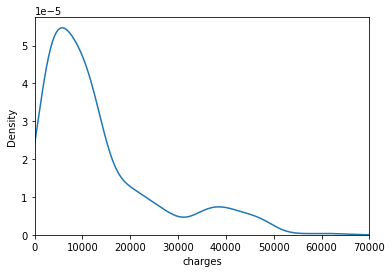

In [25]:
#data['charges'].hist()
sns.distplot(data['charges'],hist=False)
plt.xlim([0, 70000])

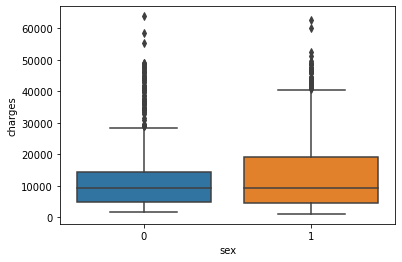

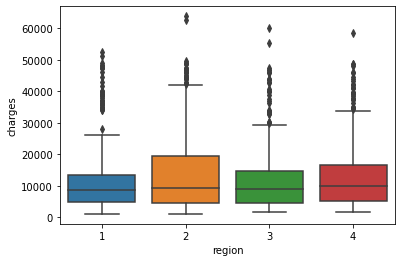

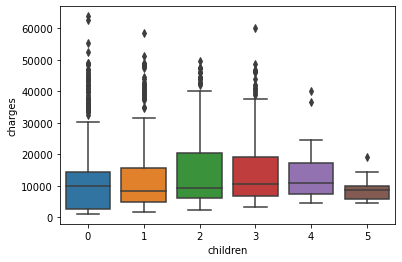

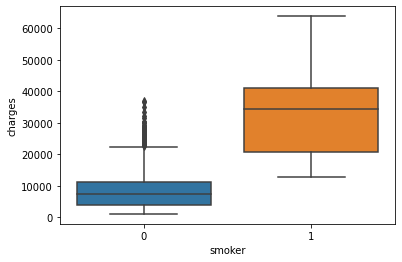

In [26]:
for feat in ['sex', 'region' ,'children' ,'smoker'] :
    sns.boxplot(data[feat] ,data['charges'])
    plt.show()

- **sex** and **region** donot have any noticeable difference for each category in term of charges given

- there is an increasing trend in charges as the **children** increases.

- **smoker** seems to make a significant difference to charges given by health insurance.

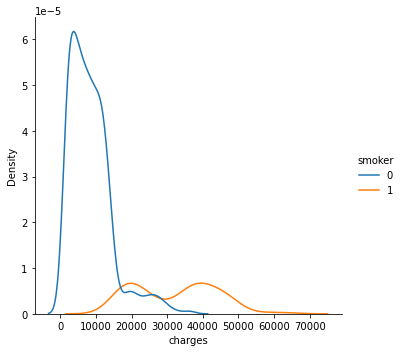

In [27]:
sns.displot(x='charges' ,hue='smoker' ,data=data ,kind="kde")

- Smokers definitely have more charges than non-smokers.

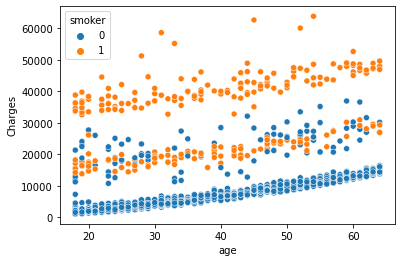

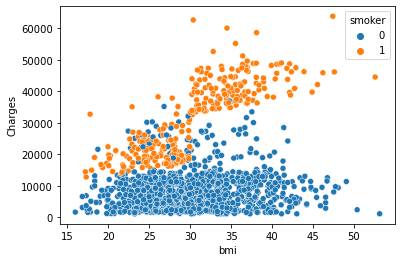

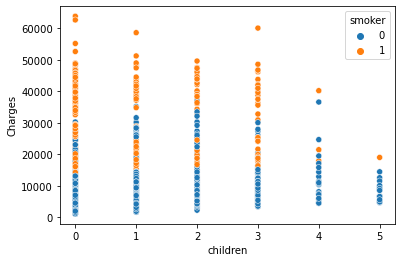

In [28]:
for col in ['age', 'bmi', 'children']:

    sns.scatterplot(x=col ,y='charges',data=data,hue='smoker')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()

Text(0.5, 1.0, 'Smoker vs Charge')

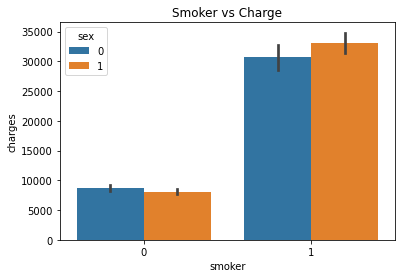

In [29]:
sns.barplot(x='smoker',y='charges',data=data,hue='sex')
plt.title('Smoker vs Charge')

In [30]:
corr_vals = []
collabel  = []

for feat in data.columns:
    if feat!='charges':
        p_val = pearsonr(data[feat],data["charges"])
        corr_vals.append(np.abs(p_val[0]))
        collabel.append(feat)

Text(0, 0.5, 'Absolute correlation')

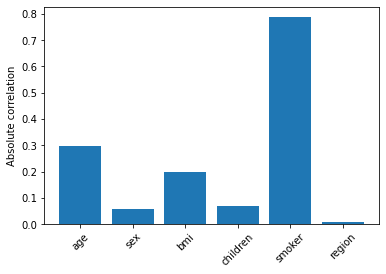

In [31]:
plt.bar( range(1,len(corr_vals)+1) , corr_vals )

plt.xticks( range(1,len(corr_vals)+1) , collabel ,rotation=45 )

plt.ylabel("Absolute correlation")

<AxesSubplot:>

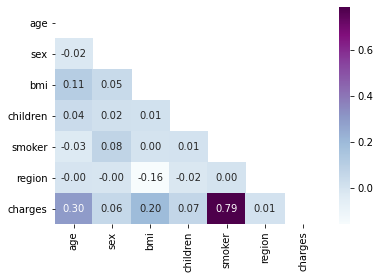

In [32]:
corr = data.corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr ,annot=True ,mask=mask ,cmap='BuPu',fmt=".2f")

- there are almost no correlations between features except for smoker and charges

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


## Training Model

In [34]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
bmi_sc = StandardScaler()
X_train['bmi'] = bmi_sc.fit_transform(X_train['bmi'].values.reshape(-1,1))
X_test['bmi']  = bmi_sc.transform(X_test['bmi'].values.reshape(-1,1))

In [37]:
age_sc = StandardScaler()
X_train['age'] = age_sc.fit_transform(X_train['age'].values.reshape(-1,1))
X_test['age']  = age_sc.transform(X_test['age'].values.reshape(-1,1))

In [38]:
charges_sc = StandardScaler()
y_train = charges_sc.fit_transform(y_train.values.reshape(-1,1))
y_test  = charges_sc.transform(y_test.values.reshape(-1,1))

### Model1 : Linear Regression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
lr_pred = lr.predict(X_test)

In [42]:
lr_rmse = np.sqrt(mse(y_test ,lr_pred))
lr_rmse

0.5282236772021418

In [43]:
lr_score = lr.score(X_test ,y_test)
lr_score

0.7631717420685993

Text(0, 0.5, 'Predicted Y')

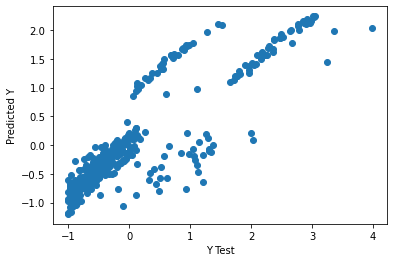

In [44]:
plt.scatter(y_test,lr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Model2 : Ridge Regressor

In [45]:
params = { 
           'alpha': [0.0001 ,0.0005 ,0.001 ,0.005 ,0.01 ,0.5 ,0.1 ,1 ,5 ,10 ,20 ,100]
         }

In [46]:
ridge = GridSearchCV(Ridge(random_state=0) , params, cv=10)

In [47]:
ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.5, 0.1,
                                   1, 5, 10, 20, 100]})

In [48]:
ridge.best_params_

{'alpha': 1}

In [49]:
ridge.best_score_

0.7267291565874532

In [50]:
ridge = Ridge(alpha=1 ,random_state=0)

In [51]:
ridge.fit(X_train, y_train)

Ridge(alpha=1, random_state=0)

In [52]:
ridge_pred = ridge.predict(X_test)

In [53]:
ridge_rmse = np.sqrt(mse(y_test ,ridge_pred))
ridge_rmse

0.5285571539414656

In [54]:
ridge_score = ridge.score(X_test ,y_test)
ridge_score

0.7628726201309535

### Model3 : Decision Tree Regressor

In [55]:
params = { 
           'max_depth'         : np.arange(1,50,2),
           'min_samples_leaf'  : [7,10,12]        ,
           'criterion'         : ['mse']
         }

In [56]:
dt = GridSearchCV(
                   DecisionTreeRegressor() ,
                   params                  ,
                   cv = 10                 ,
                   n_jobs = -1 
                )

In [57]:
dt.fit(X_train ,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'min_samples_leaf': [7, 10, 12]})

In [58]:
dt.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=12)

In [59]:
dt.best_score_

0.8477709154017303

In [60]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=12)

In [61]:
dt.fit(X_train ,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=12)

In [62]:
dt_pred = dt.predict(X_test)

In [63]:
dt_rmse = np.sqrt(mse(y_test ,dt_pred))
dt_rmse

0.4237173018839166

In [64]:
dt_score = dt.score(X_test ,y_test)
dt_score

0.8476122038508191

### Model4 : Random Forest Regressor

In [65]:
params = { 
           'n_estimators'      : [600,1000,1200] ,
           'max_features'      : ["auto"]        ,
           'max_depth'         : [40,50,60]      ,
           'min_samples_split' : [5,7,9]         ,
           'min_samples_leaf'  : [7,10,12]       ,
           'criterion'         : ['mse']
         }

In [66]:
rfg = RandomizedSearchCV(
                          RandomForestRegressor() ,
                          params                  ,
                          cv = 10                 ,
                          n_iter = 10             ,
                          n_jobs = -1 
                        )

In [67]:
rfg.fit(X_train ,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [40, 50, 60],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [7, 10, 12],
                                        'min_samples_split': [5, 7, 9],
                                        'n_estimators': [600, 1000, 1200]})

In [68]:
rfg.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1000)

In [69]:
rfg.best_score_

0.851541578443913

In [70]:
rfg = RandomForestRegressor(
                             max_depth         = 60 , 
                             min_samples_leaf  = 10 , 
                             min_samples_split = 9  ,
                             n_estimators      = 1000
                           )

In [71]:
rfg.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=10, min_samples_split=9,
                      n_estimators=1000)

In [72]:
rfg_pred = rfg.predict(X_test)

In [73]:
rfg_rmse = np.sqrt(mse(y_test ,rfg_pred))
rfg_rmse

0.3994350181241912

In [74]:
rfg_score = rfg.score(X_test ,y_test)
rfg_score

0.8645777376393851

### Model5 : Support Vector Machine

In [75]:
params = { 
           'kernel' : ['rbf', 'sigmoid']             ,
           'gamma'  : [0.001, 0.01, 0.1, 1, 'scale'] ,
           'tol'    : [0.0001]                       ,
           'C'      : [0.001, 0.01, 0.1, 1, 10, 100] 
         }

In [76]:
svr = RandomizedSearchCV(SVR() ,params ,cv=10, n_jobs=-1, verbose=4)

In [77]:
svr.fit(X_train ,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                                        'kernel': ['rbf', 'sigmoid'],
                                        'tol': [0.0001]},
                   verbose=4)

In [78]:
svr.best_params_

{'tol': 0.0001, 'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [79]:
svr.best_score_

0.8323964237699831

In [80]:
svr = SVR(tol=0.0001 ,kernel='rbf' ,gamma='scale' ,C=10)

In [81]:
svr.fit(X_train ,y_train)

SVR(C=10, tol=0.0001)

In [82]:
svr_pred = svr.predict(X_test)

In [83]:
svr_rmse = np.sqrt(mse(y_test ,svr_pred))
svr_rmse

0.4180613213225029

In [84]:
svr_score = svr.score(X_test ,y_test)
svr_score

0.8516533410280924

### Model6 : XgBoost

In [85]:
xgbr = XGBRegressor()

In [86]:
xgbr.fit(X_train ,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
xgbr_pred = xgbr.predict(X_test)

In [88]:
xgbr_rmse = np.sqrt(mse(y_test ,xgbr_pred))
xgbr_rmse

0.4475699714310609

In [89]:
xgbr_score = xgbr.score(X_test ,y_test)
xgbr_score

0.8299723024226116

## Select Best Model

In [90]:
model = pd.DataFrame({
                       'Model' : ['LinearRegression' ,'Ridge','Decision Tree' ,'Random Forest','Support Vector Machine','XgBoost'] ,
                       'RMSE'  : [lr_rmse,ridge_rmse,dt_rmse,rfg_rmse,svr_rmse,xgbr_rmse] ,
                       'Score' : [lr_score,ridge_score,dt_score,rfg_score,svr_score,xgbr_score]
                     })

In [91]:
model.sort_values(by='Score' ,ascending=False,ignore_index=True)

,Model,RMSE,Score
0,Random Forest,0.399435,0.864578
1,Support Vector Machine,0.418061,0.851653
2,Decision Tree,0.423717,0.847612
3,XgBoost,0.447570,0.829972
4,LinearRegression,0.528224,0.763172
5,Ridge,0.528557,0.762873


## Pickle Model

In [92]:
fp = open('ModelFile.pkl','wb')
pickle.dump(rfg,fp)

In [93]:
fp = open('ModelFile.pkl','rb')
model = pickle.load(fp)

## Test Model : Medical Insurance for a Patient

In [94]:
def calculate_insurance(name,age,sex,bmi,children,smoker,region):
    
    age = age_sc.transform(np.array([age]).reshape(-1,1)) 
    bmi = bmi_sc.transform(np.array([bmi]).reshape(-1,1))
    
    prediction = [[age,sex,bmi,children,smoker,region]]
    
    res = model.predict(prediction)  
    res = charges_sc.inverse_transform(res)
    
    print(f"Medical Insurance cost for {name} is : {res}")

In [95]:
calculate_insurance('Rahul',19,0,27.900,0,1,1)

Medical Insurance cost for Rahul is : [17561.7154808]


In [96]:
calculate_insurance('Ryan',32,1,28.880,0,0,3)

Medical Insurance cost for Ryan is : [4769.97940817]


In [97]:
calculate_insurance('Raj',20,1,28,0,1,3)

Medical Insurance cost for Raj is : [17883.19877869]
